In [1]:
import numpy as np
import collections
import os
import matplotlib.pyplot as plt

In [2]:
class dataset():
    "Stores name and place pairs"
    def __init__(self, fname, Nphotons, sigma):
        self.fname = fname
        self.Nphotons = Nphotons
        self.sigma = sigma
        #to be filled later
        self.data = None
        self.precision = None
        self.theoreticalPrecision = None

In [3]:
wdir = r'K:\vanderVoortN\FRC\BenchmarkGaussFit'
data = []
data.append(dataset(os.path.join(wdir,'A10Sigma4\Colocalization Fit results/Green Photons_Fit results.cla4'), 1000, 4))
data.append(dataset(os.path.join(wdir,'A10Sigma8\Colocalization Fit results/Green Photons_Fit results.cla4'), 4000, 8))
data.append(dataset(os.path.join(wdir,'A50Sigma4\Colocalization Fit results/Green Photons_Fit results.cla4'), 5000, 4))
data.append(dataset(os.path.join(wdir,'A50Sigma8\Colocalization Fit results/Green Photons_Fit results.cla4'), 20000, 8))
data.append(dataset(os.path.join(wdir,'A500Sigma4\Colocalization Fit results/Green Photons_Fit results.cla4'), 50000, 4))
data.append(dataset(os.path.join(wdir,'A500Sigma8\Colocalization Fit results/Green Photons_Fit results.cla4'), 200000, 8))
data.append(dataset(os.path.join(wdir,'A10Sigma1\Colocalization Fit results/Green Photons_Fit results.cla4'), 62, 1))
data.append(dataset(os.path.join(wdir,'A10Sigma2\Colocalization Fit results/Green Photons_Fit results.cla4'), 250, 2))


BeadLst = np.genfromtxt(os.path.join(wdir,'GaussDat2D_spotLst.txt'))
BeadLst = BeadLst[BeadLst[:,0].argsort()]

In [5]:
def getFisherPrecision(Nphotons, sigma):
    return 2 * sigma / (np.pi * np.sqrt(Nphotons))

In [26]:
for i in range(8):
    data_tmp = np.genfromtxt(data[i].fname, delimiter = '\t', skip_header = 1)[:,2:4]
    data_tmp = data_tmp[data_tmp[:,0].argsort()]-BeadLst
    #check all elements in list and delete those with more than 5 pixels difference. 
    #This is done to remove those sorting errors
    l = []
    for j in range(data_tmp.data.shape[0]):
        if (np.linalg.norm(data_tmp[j]) > 5):
            print("data %d at position %d is bad" % (i,j))
        else:
            l.append(j)
    data[i].data = data_tmp[l]
    data[i].theoreticalPrecision = getFisherPrecision(data[i].Nphotons, data[i].sigma)
    data[i].precision = np.std(data[i].data)

data 1 at position 6 is bad
data 1 at position 7 is bad
data 3 at position 19 is bad
data 3 at position 20 is bad
data 6 at position 15 is bad
data 6 at position 16 is bad
data 6 at position 17 is bad
data 6 at position 18 is bad
data 6 at position 20 is bad
data 6 at position 21 is bad
data 6 at position 22 is bad
data 6 at position 23 is bad
data 6 at position 24 is bad
data 6 at position 25 is bad
data 6 at position 26 is bad
data 6 at position 27 is bad
data 6 at position 28 is bad
data 6 at position 29 is bad


In [18]:
np.arange(0, len(data[6].data), 1).shape
data[6].data.shape

(23, 2)

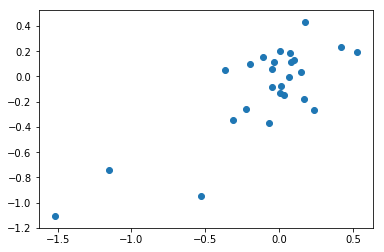

In [27]:
plt.scatter(data[6].data[:,0], data[6].data[:,1])

In [20]:
for i in range(8):
    print("precision is " + str(data[i].precision))
    print("theoretical precision is " + str(data[i].theoreticalPrecision))

precision is 0.15866767676844956
theoretical precision is 0.08052673936717927
precision is 0.22100549561930039
theoretical precision is 0.08052673936717927
precision is 0.06895642592605276
theoretical precision is 0.03601265264628425
precision is 0.07543876687949258
theoretical precision is 0.03601265264628425
precision is 0.024568482055568743
theoretical precision is 0.011388200694674833
precision is 0.023257628020083125
theoretical precision is 0.011388200694674833
precision is 0.20091307037446915
theoretical precision is 0.0808507919415152
precision is 0.1398281363320248
theoretical precision is 0.08052673936717927


In [22]:
#transfer into plottable lists
sigma4 = np.zeros(3)
sigma4_fisher = np.zeros(3)
sigma8 = np.zeros(3)
sigma8_fisher = np.zeros(3)
for i, el in enumerate(np.arange(0,6,2)):
    print(el)
    sigma4[i] = data[el].precision
    sigma4_fisher[i] = data[el].theoreticalPrecision
for i, el in enumerate(np.arange(1,6,2)):
    print(i)
    sigma8[i] = data[el].precision
    sigma8_fisher[i] = data[el].theoreticalPrecision
Amplitudes = [10, 50, 500]

0
2
4
0
1
2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=10.0, right=10.0
  'left=%s, right=%s') % (left, right))


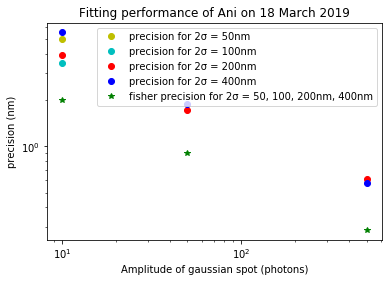

In [23]:
px = 25
plt.loglog(10, data[6].precision*px, 'yo', label = 'precision for 2\u03C3 = 50nm')
plt.loglog(10, data[7].precision*px, 'co', label = 'precision for 2\u03C3 = 100nm')
plt.loglog(Amplitudes, sigma4*px, 'ro', label = 'precision for 2\u03C3 = 200nm')
plt.loglog(Amplitudes, sigma8*px, 'bo', label = 'precision for 2\u03C3 = 400nm')
plt.loglog(Amplitudes, sigma4_fisher*px, 'g*', label = u'fisher precision for 2\u03C3 = 50, 100, 200nm, 400nm')
plt.legend()
plt.title("Fitting performance of Ani on 18 March 2019")
plt.xlabel("Amplitude of gaussian spot (photons)")
plt.ylabel("precision (nm)")
plt.savefig("AniFitPerformance.png", dpi = 300)